# 1. 单层感知机

## 1.1 感知机

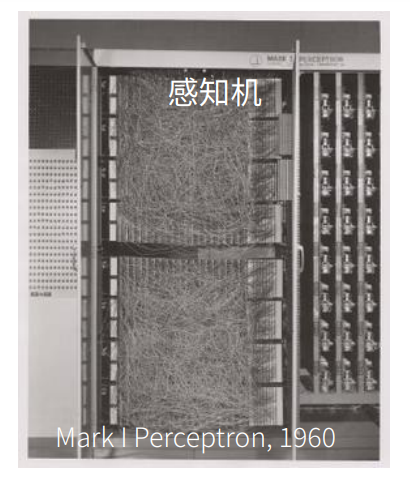

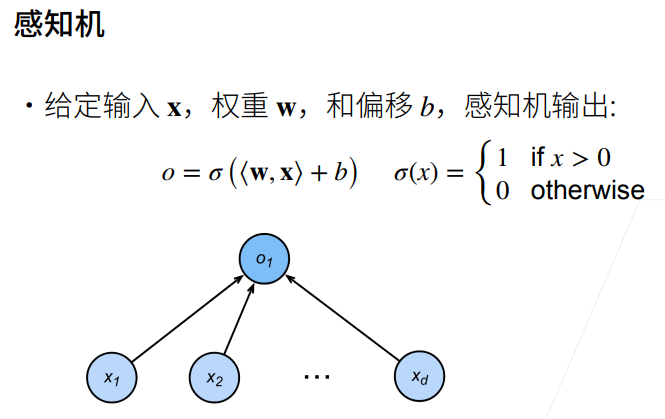

① 线性回归输出的是一个实数，感知机输出的是一个离散的类。

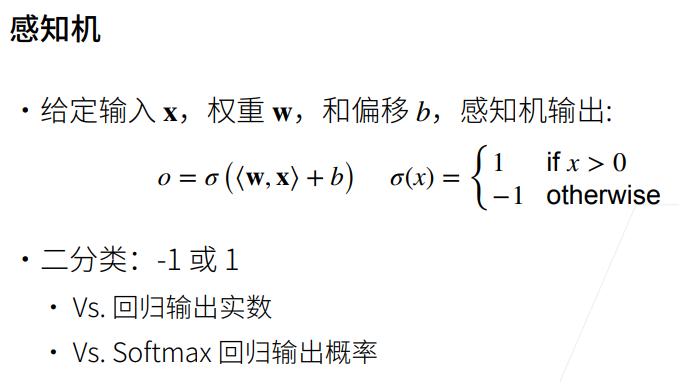

## 1.2 训练感知机

① 如果分类正确的话y<w,x>为正数，负号后变为一个负数，max后输出为0，则梯度不进行更新。

② 如果分类错了，y<w,x>为负数，下图中的if判断就成立了，就有梯度进行更新。

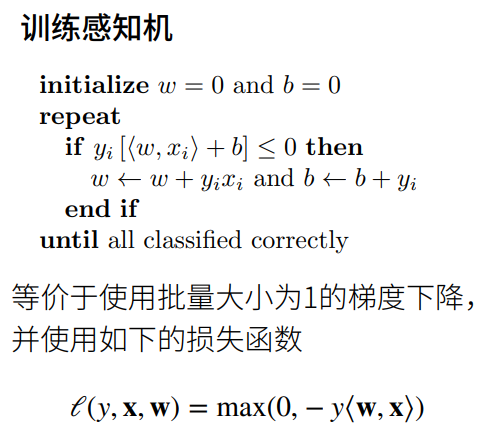

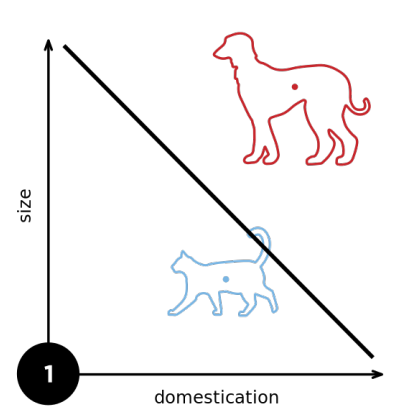

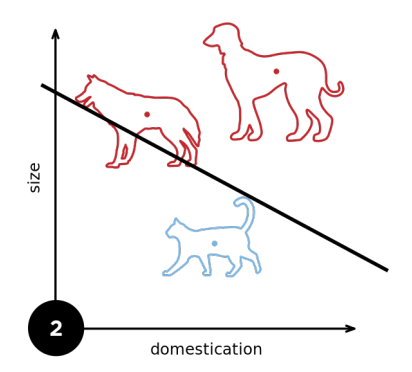

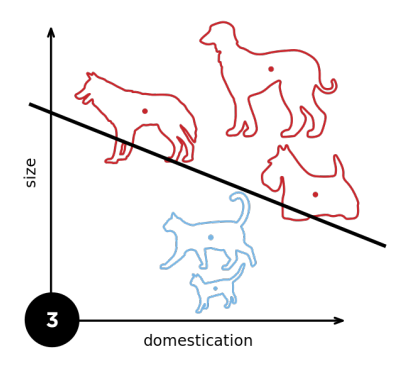

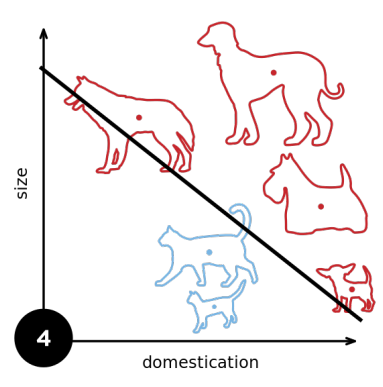

## 1.3 收敛半径

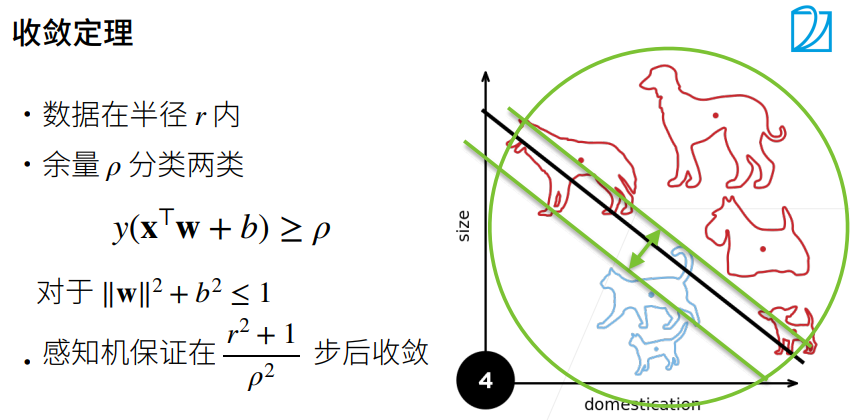

## 1.4 XOR问题

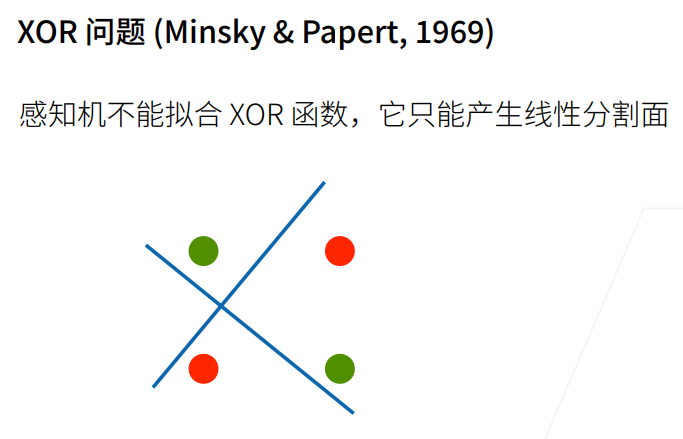

## 1.5 总结

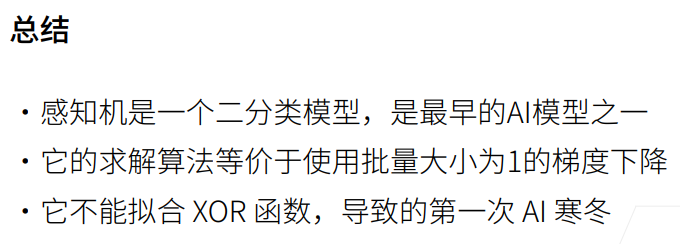

# 2. 多层感知机

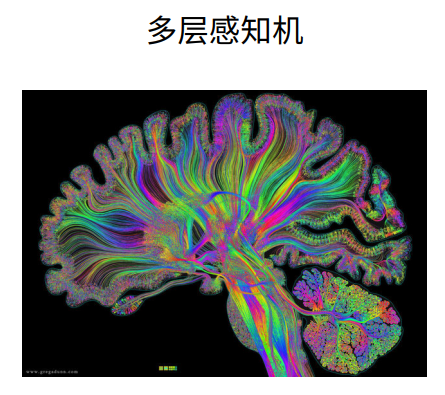

## 2.1 学习XOR

① 先用蓝色的线分，再用黄色的线分。

② 再对蓝色的线和黄色的线分出来的结果做乘法。

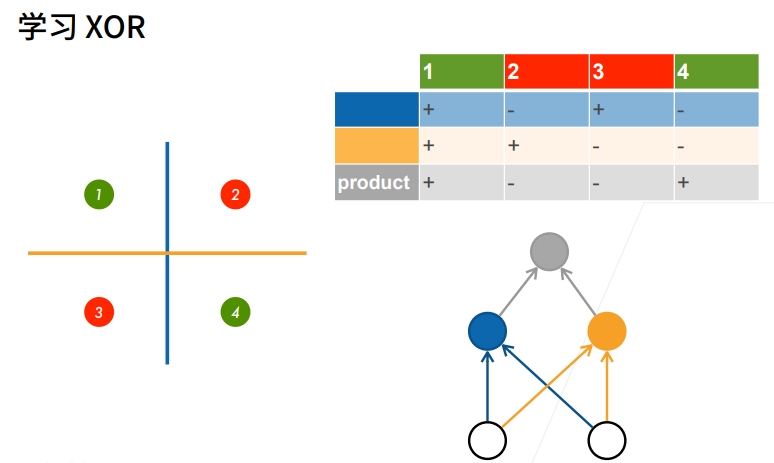

## 2.2 单隐藏层

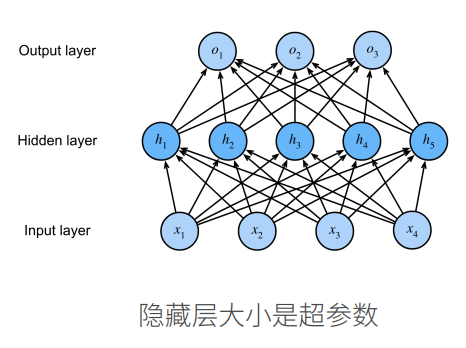

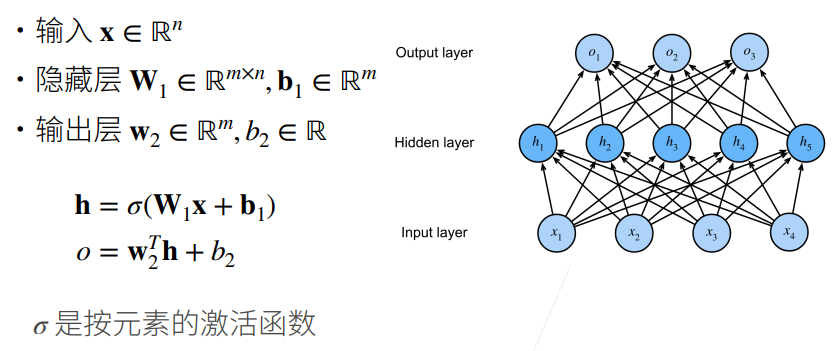

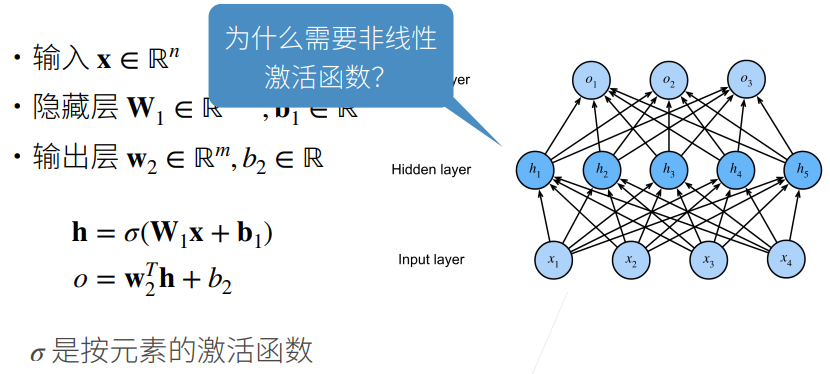

① 不用激活函数的话，所以全连接层连接在一起依旧可以用一个最简单的线性函数来表示。

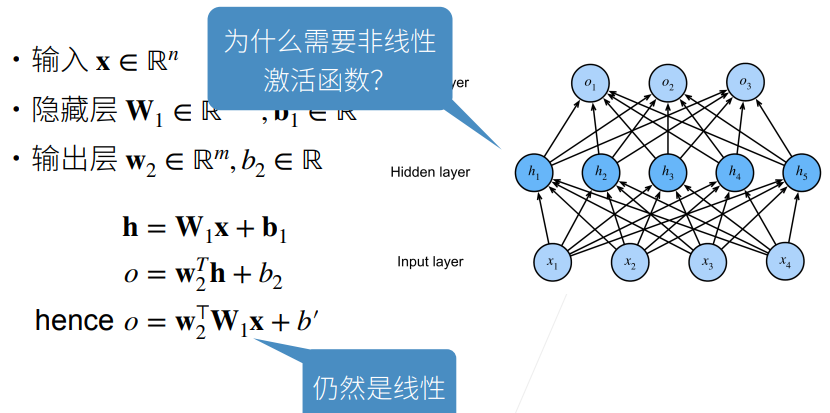

## 2.3 Sigmoid 函数

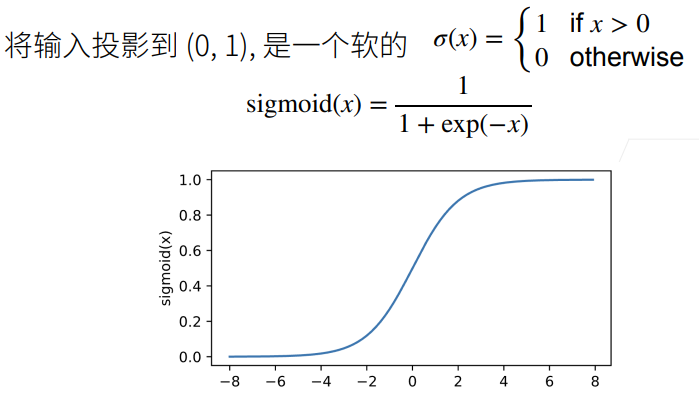

## 2.4 Tanh函数

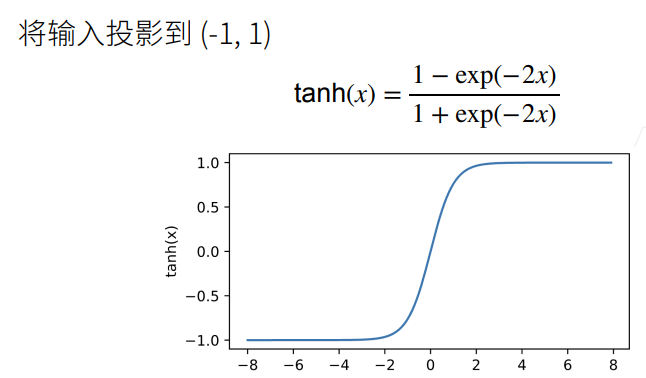

## 2.5 ReLU

① ReLU的好处在于不需要执行指数运算。

② 在CPU上一次指数运算相当于上百次乘法运算。

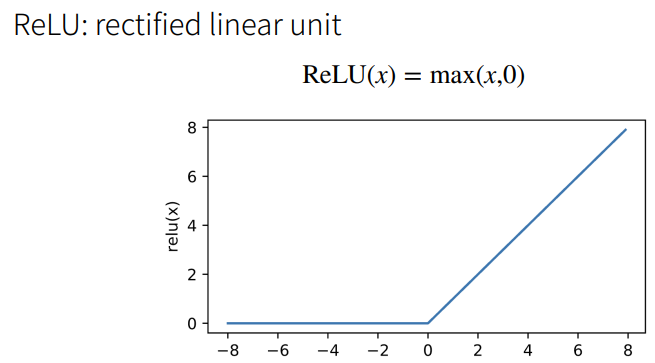

## 2.6 多类分类

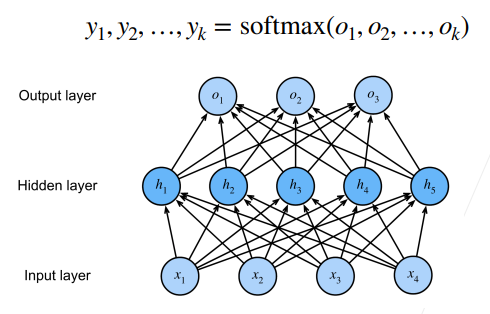

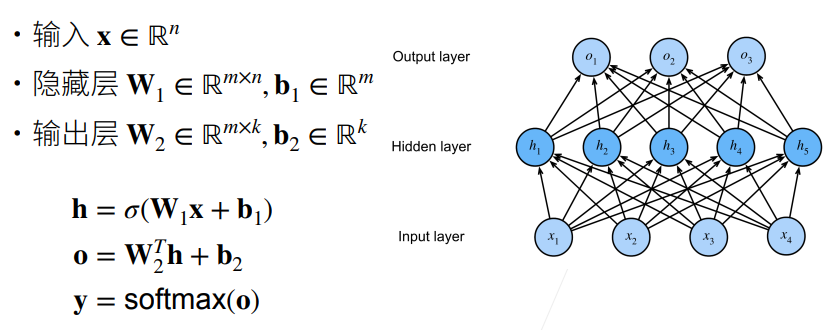

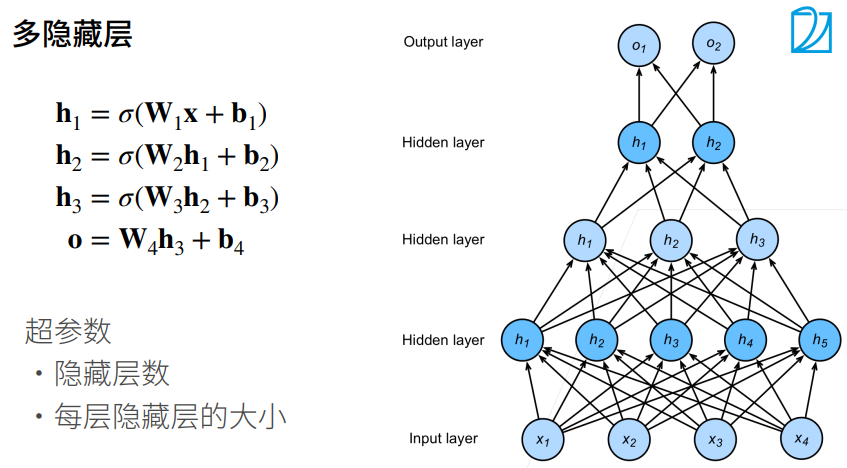

## 2.7 总结

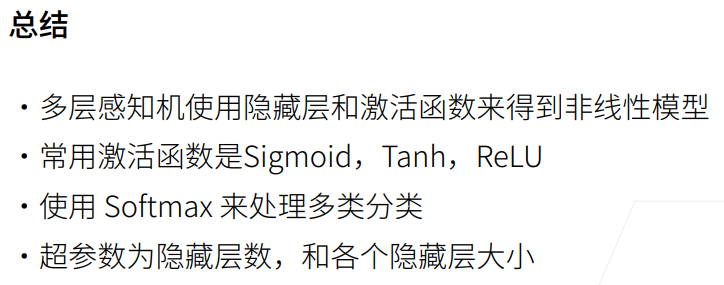

# 1. 多层感知机（使用自定义）

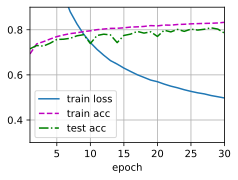

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# 实现一个具有单隐藏层的多层感知机，它包含256个隐藏单元
num_inputs, num_outputs, num_hiddens = 784, 10, 256 # 输入、输出是数据决定的，256是调参自己决定的
W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True))
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True))
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))
params = [W1,b1,W2,b2]

# 实现 ReLu 激活函数
def relu(X):
    a = torch.zeros_like(X) # 数据类型、形状都一样，但是值全为 0
    return torch.max(X,a)

# 实现模型
def net(X):
    #print("X.shape:",X.shape)
    X = X.reshape((-1, num_inputs)) # -1为自适应的批量大小
    #print("X.shape:",X.shape)
    H = relu(X @ W1 + b1)
    #print("H.shape:",H.shape)
    #print("W2.shape:",W2.shape)
    return (H @ W2 + b2)

# 损失
loss = nn.CrossEntropyLoss() # 交叉熵损失

# 多层感知机的训练过程与softmax回归的训练过程完全一样
num_epochs ,lr = 30, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

# 2. 多层感知机（使用框架）

① 调用高级API更简洁地实现多层感知机。

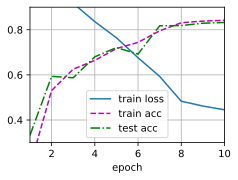

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

# 隐藏层包含256个隐藏单元，并使用了ReLU激活函数
net = nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.ReLU(),nn.Linear(256,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,std=0,)
        
net.apply(init_weights)

# 训练过程
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)